## Lyft Data Challenge - Recommend a Driver's Lifetime Value

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [37]:
driver = pd.read_csv('E:/Projects/Lyft_ChunziWang/Lyft Data Science Assignment/data/driver_ids.csv')
ride = pd.read_csv('E:/Projects/Lyft_ChunziWang/Lyft Data Science Assignment/data/ride_ids.csv')
ts = pd.read_csv('E:/Projects/Lyft_ChunziWang/Lyft Data Science Assignment/data/ride_timestamps.csv')

In [3]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
driver_id              937 non-null object
driver_onboard_date    937 non-null object
dtypes: object(2)
memory usage: 14.7+ KB


In [4]:
driver.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [5]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
driver_id          193502 non-null object
ride_id            193502 non-null object
ride_distance      193502 non-null int64
ride_duration      193502 non-null int64
ride_prime_time    193502 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


In [6]:
ride.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [7]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
ride_id      970405 non-null object
event        970405 non-null object
timestamp    970404 non-null object
dtypes: object(3)
memory usage: 22.2+ MB


In [8]:
ts.head(10)

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05
5,00005eae40882760d675da5effb89ae3,requested_at,2016-05-14 05:23:21
6,00005eae40882760d675da5effb89ae3,accepted_at,2016-05-14 05:23:25
7,00005eae40882760d675da5effb89ae3,arrived_at,2016-05-14 05:26:17
8,00005eae40882760d675da5effb89ae3,picked_up_at,2016-05-14 05:26:18
9,00005eae40882760d675da5effb89ae3,dropped_off_at,2016-05-14 05:34:17


In [38]:
# look at time range of the rides in dataset
ts['timestamp'] = pd.to_datetime(ts['timestamp'])
print(ts['timestamp'].min())
print(ts['timestamp'].max())

# look at the time range of driver onboarding time in the dataset
# driver['driver_onboard_date'] = pd.to_datetime(driver['driver_onboard_date'])
print(driver['driver_onboard_date'].min())
print(driver['driver_onboard_date'].max())

2016-03-28 05:48:18
2016-06-27 00:50:50
2016-03-28 00:00:00
2016-05-15 00:00:00


#### Findings: 
- Rides happened during 03/28 and 06/27, 3 months period.
- Drivers onboarded during 03/28 and 05/15, 2 months period.

In [39]:
# add a date column for every ride
ts['date'] = ts['timestamp'].apply(lambda x:x.date()) # transfrom from datetime to date. Note: output is still in object format
ride = pd.merge(ride,ts.loc[ts['event'] == 'picked_up_at',['ride_id','date']],how = 'left',on = 'ride_id') # append date column to ride df
ride.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,date
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20


In [40]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193502 entries, 0 to 193501
Data columns (total 6 columns):
driver_id          193502 non-null object
ride_id            193502 non-null object
ride_distance      193502 non-null int64
ride_duration      193502 non-null int64
ride_prime_time    193502 non-null int64
date               184819 non-null object
dtypes: int64(3), object(3)
memory usage: 10.3+ MB


#### Findings:
- There're some rides that don't have date info. Need to do an imputation so the following date manipulation code could run. 

In [41]:
# add driver_onboard_date column to the df, so we could fill na with driver onboard month for this batch (beginner passion)
ride = pd.merge(ride,driver,how='left',on='driver_id')

In [42]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193502 entries, 0 to 193501
Data columns (total 7 columns):
driver_id              193502 non-null object
ride_id                193502 non-null object
ride_distance          193502 non-null int64
ride_duration          193502 non-null int64
ride_prime_time        193502 non-null int64
date                   184819 non-null object
driver_onboard_date    185891 non-null object
dtypes: int64(3), object(4)
memory usage: 11.8+ MB


#### Findings:
- Turns out most of the rides that do not have a date comes from drivers who're not in our driver database. To make our analysis more accurate, we'll try to impute some based on driver onboard date, and remove other rows that have Null in both date columns.

In [43]:
# check on the rows that have driver onboard date but not ride date
ride[ride['date'].isnull() & ride['driver_onboard_date'].notnull()]

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,date,driver_onboard_date
12819,136b51093f684e15e2798e4dc1e23d0c,00f81d0454c12834026937cf20bff2a1,4094,671,0,NaN,2016-05-14 00:00:00
12820,136b51093f684e15e2798e4dc1e23d0c,02170e3fd53c587c75b0dea9c0273a83,6881,572,0,NaN,2016-05-14 00:00:00
12821,136b51093f684e15e2798e4dc1e23d0c,02e93a8868fb14ba96d988466d47fba5,6576,674,0,NaN,2016-05-14 00:00:00
12822,136b51093f684e15e2798e4dc1e23d0c,069643466b5b274af6a762c68247c696,3164,787,75,NaN,2016-05-14 00:00:00
12823,136b51093f684e15e2798e4dc1e23d0c,06d6ac32d2f6d93873431857e6cd9534,19731,1675,0,NaN,2016-05-14 00:00:00
12824,136b51093f684e15e2798e4dc1e23d0c,086064c33c68661d66fb0bae178aa828,3089,577,0,NaN,2016-05-14 00:00:00
12825,136b51093f684e15e2798e4dc1e23d0c,0c512b5929876af86c4d54ee0a6d113d,3682,684,100,NaN,2016-05-14 00:00:00
12826,136b51093f684e15e2798e4dc1e23d0c,0fdc80f1dcd5909e47019f42fd7ec91a,2793,915,50,NaN,2016-05-14 00:00:00
12827,136b51093f684e15e2798e4dc1e23d0c,110ecdb15bd61996d9cf1bb2b3659ab8,4588,1014,0,NaN,2016-05-14 00:00:00
12828,136b51093f684e15e2798e4dc1e23d0c,13c85cc4071024f29fabf7a21c88f9e7,2212,353,0,NaN,2016-05-14 00:00:00


In [44]:
# impute
ride['date'].fillna(ride['driver_onboard_date'],inplace=True)

In [45]:
ride[ride['date'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186501 entries, 0 to 193501
Data columns (total 7 columns):
driver_id              186501 non-null object
ride_id                186501 non-null object
ride_distance          186501 non-null int64
ride_duration          186501 non-null int64
ride_prime_time        186501 non-null int64
date                   186501 non-null object
driver_onboard_date    185891 non-null object
dtypes: int64(3), object(4)
memory usage: 11.4+ MB


#### Findings:
- There're some rides of drivers that don't have an onboard date, but that won't be an issue here. We'll just extract month from ride date and do analysis onward. 

In [46]:
ride = ride[ride['date'].notnull()]

In [47]:
# add a month column for aggregation purpose
# ride['date'][0].month -- this will only return the month number, 4
ride['date'] = pd.to_datetime(ride['date'])
ride['month'] = ride['date'].apply(lambda x:x.to_period('M'))
ride.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,date,driver_onboard_date,month
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23,2016-03-29 00:00:00,2016-04
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29,2016-03-29 00:00:00,2016-03
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21,2016-03-29 00:00:00,2016-06
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19,2016-03-29 00:00:00,2016-05
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20,2016-03-29 00:00:00,2016-04


In [48]:
# calculate revenue for each ride
ride['fare'] = (2 + ride['ride_distance']/1609.344*1.15 + ride['ride_duration']/60*0.22 + 1.75)*(1+ride['ride_prime_time']/100)
# control for min -- 5 and max -- 400
ride.loc[ride['fare'] < 5,'fare'] = 5
ride.loc[ride['fare'] > 400,'fare'] = 400

In [49]:
# see the distribution of fares
ride['fare'].describe()

count    186501.000000
mean         13.830964
std          10.034643
min           5.000000
25%           8.157997
50%          10.838110
75%          15.615078
max         400.000000
Name: fare, dtype: float64

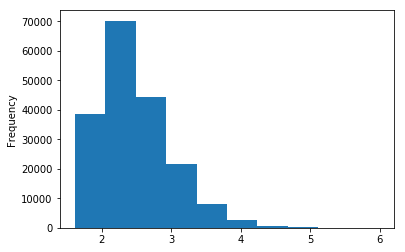

In [50]:
np.log(ride['fare']).plot.hist()

### Calculating driver LTV

- **Definition of Churn**: Drivers who has no rides in the following month.

In [51]:
# group by driver_id and month to see the performance of each driver at a monthly basis
ride.groupby(['driver_id','month']).agg({'fare':'sum','ride_id':'count'})

fare  ride_id
driver_id                        month                        
002be0ffdc997bd5c50703158b7c2491 2016-03   133.513252       14
                                 2016-04  1218.721326       98
                                 2016-05   870.255641       53
                                 2016-06  1432.494749      112
007f0389f9c7b03ef97098422f902e62 2016-03    19.566141        1
                                 2016-04   124.811795       12
                                 2016-05    98.591142        9
                                 2016-06    89.463120        9
011e5c5dfc5c2c92501b8b24d47509bc 2016-04   172.269986       12
                                 2016-05   271.120590       17
                                 2016-06    50.849780        5
0152a2f305e71d26cc964f8d4411add9 2016-04   341.415115       25
                                 2016-05   730.835804       57
                                 2016-06  1574.492814      109
01674381af7edd264113d4e6ed55ecda 2016-04    80.238556        5
                                 2016-05  2762.062299      193
                                 2016-06  2621.040664      177
0213f8b59219e32142711992ca4ec01f 2016-04  2045.024586      162
                                 2016-05   939.445068       78
021e5cd15ef0bb3ec20a12af99e142b3 2016-05   408.943124       31
                                 2016-06   298.298418       22
0258e250ca195cc6258cbdc75aecd853 2016-04   152.233409       13
                                 2016-05  1878.399252      131
                                 2016-06  2310.227541      158
028b5a4dcd7f4924ebfabcf2e814c014 2016-05  2068.440289      156
                                 2016-06  3198.647432      207
02d6a6b8a6da15fc219a9570f7ebbe78 2016-05   558.167144       31
                                 2016-06  1011.843064       31
02e440f6c209206375833cef02e0cbae 2016-03    64.068996        2
                                 2016-04   583.079860       45
...                                               ...      ...
fda96e6cd3395dfae3e59cd4ac95f7d7 2016-05  1666.857052       91
                                 2016-06  1321.205238       98
fdbee494c73577d5b1266d1fec5c6c9a 2016-05   303.025853       13
                                 2016-06   351.645980       34
fde60697758e68d617f471e49f65db75 2016-04   451.270300       32
fdff1a7205bc3b9ab1dc5dc223782fc5 2016-03   113.551128       13
                                 2016-04  3756.966580      309
                                 2016-05  2205.380327      157
                                 2016-06   499.123306       36
fe35f74209d1056dd315ddb17681203d 2016-04  1677.089599      133
                                 2016-05  2584.877389      214
                                 2016-06   891.918656       75
fe469488a23d4bdda47b83a659dcc103 2016-04  1357.666779      111
                                 2016-05  1733.233110      135
                                 2016-06   559.817140       43
fed19d671569afe8a2f9fa0953dd25ca 2016-03     6.250173        1
                                 2016-04   470.065926       32
ff419a3476e21e269e340b5f1f05414e 2016-04   490.189444       26
                                 2016-05  1798.578464      128
                                 2016-06  1303.855870       88
ff714a67ba8c6a108261cd81e3b77f3a 2016-03   536.419792       42
                                 2016-04  2492.254010      201
                                 2016-05  2314.043170      156
                                 2016-06  1095.583241       86
fff482c704d36a1afe8b8978d5486283 2016-04   196.767620       21
                                 2016-05   186.955976       14
fffecccc49436c5389075b13209f0dfa 2016-05  2898.434149      196
                                 2016-06  3364.584025      210
ffff51a71f2f185ec5e97d59dbcd7a78 2016-05  2348.543232      153
                                 2016-06  2348.535521      177

[2197 rows x 2 columns]

In [52]:
# turn the group by object into df
driver_monthly_rev = ride.groupby(['driver_id','month']).agg({'fare':'sum','ride_id':'count'}).reset_index()
driver_monthly_rev.head(10)

,driver_id,month,fare,ride_id
0,002be0ffdc997bd5c50703158b7c2491,2016-03,133.513252,14
1,002be0ffdc997bd5c50703158b7c2491,2016-04,1218.721326,98
2,002be0ffdc997bd5c50703158b7c2491,2016-05,870.255641,53
3,002be0ffdc997bd5c50703158b7c2491,2016-06,1432.494749,112
4,007f0389f9c7b03ef97098422f902e62,2016-03,19.566141,1
5,007f0389f9c7b03ef97098422f902e62,2016-04,124.811795,12
6,007f0389f9c7b03ef97098422f902e62,2016-05,98.591142,9
7,007f0389f9c7b03ef97098422f902e62,2016-06,89.463120,9
8,011e5c5dfc5c2c92501b8b24d47509bc,2016-04,172.269986,12
9,011e5c5dfc5c2c92501b8b24d47509bc,2016-05,271.120590,17


In [53]:
# transform pandas period object into string since month is a period object
driver_monthly_rev['month'] = driver_monthly_rev['month'].astype(str)

In [54]:
# due to pandas limitations in self join under conditions (consecutive month), we use this way to do the left join to find churned driver
march = driver_monthly_rev[driver_monthly_rev['month']=='2016-03'].reset_index(drop=True)  # drop original index column
april = driver_monthly_rev[driver_monthly_rev['month']=='2016-04'].reset_index(drop=True)
may = driver_monthly_rev[driver_monthly_rev['month']=='2016-05'].reset_index(drop=True)
june = driver_monthly_rev[driver_monthly_rev['month']=='2016-06'].reset_index(drop=True)

In [55]:
print(march.shape)
print(april.shape)
print(may.shape)
print(june.shape)

(97, 4)
(631, 4)
(790, 4)
(679, 4)


In [56]:
churn_3_4 = pd.merge(march,april,how='left',on='driver_id')
churn_3_4['churn'] = 0
churn_3_4.loc[churn_3_4['month_y'].isnull(),'churn'] = 1

churn_4_5 = pd.merge(april,may,how='left',on='driver_id')
churn_4_5['churn'] = 0
churn_4_5.loc[churn_4_5['month_y'].isnull(),'churn'] = 1

churn_5_6 = pd.merge(may,june,how='left',on='driver_id')
churn_5_6['churn'] = 0
churn_5_6.loc[churn_5_6['month_y'].isnull(),'churn'] = 1

In [57]:
churn_5_6.head()

,driver_id,month_x,fare_x,ride_id_x,month_y,fare_y,ride_id_y,churn
0,002be0ffdc997bd5c50703158b7c2491,2016-05,870.255641,53,2016-06,1432.494749,112.0,0
1,007f0389f9c7b03ef97098422f902e62,2016-05,98.591142,9,2016-06,89.463120,9.0,0
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-05,271.120590,17,2016-06,50.849780,5.0,0
3,0152a2f305e71d26cc964f8d4411add9,2016-05,730.835804,57,2016-06,1574.492814,109.0,0
4,01674381af7edd264113d4e6ed55ecda,2016-05,2762.062299,193,2016-06,2621.040664,177.0,0


In [58]:
churn_rate_3_4 = sum(churn_3_4['churn'])/churn_3_4.shape[0]
churn_rate_4_5 = sum(churn_4_5['churn'])/churn_4_5.shape[0]
churn_rate_5_6 = sum(churn_5_6['churn'])/churn_5_6.shape[0]

print(churn_rate_3_4)
print(churn_rate_4_5)
print(churn_rate_5_6)

0.07216494845360824
0.10301109350237718
0.16075949367088607


#### Findings:
- Churn rate increases by month.
- I'll take the average of these three months as a overal monthly churn rate: **11%**. It means, on average, drivers have **9 months** of lifetime on Lyft platform. 

In [65]:
# make the final driver table that has the info of total revenue, number of total rides, monthly revenue, how many months he stayed with Lyft
# and if he has churned or not during the time range

# get total revenue and rides info 
driver_total_rev = ride.groupby('driver_id').agg({'fare':'sum','ride_id':'count'}).reset_index()
df = pd.merge(driver_total_rev,driver,how='left',on='driver_id')

# append monthly info

# exclude March for monthly revenue since it's too few days
mon_rev = driver_monthly_rev[driver_monthly_rev['month'] > '2016-03'].groupby('driver_id').agg({'fare':'mean'}).reset_index()
# include March for total count of month
mon_cnt = driver_monthly_rev.groupby('driver_id').agg({'month':'count'}).reset_index()

df = pd.merge(df,mon_rev,how='left',on='driver_id')
df = pd.merge(df,mon_cnt,how='left',on='driver_id')

df.head(10)

,driver_id,fare_x,ride_id,driver_onboard_date,fare_y,month
0,002be0ffdc997bd5c50703158b7c2491,3654.984968,277,2016-03-29 00:00:00,1173.823905,4
1,007f0389f9c7b03ef97098422f902e62,332.432198,31,2016-03-29 00:00:00,104.288686,4
2,011e5c5dfc5c2c92501b8b24d47509bc,494.240355,34,2016-04-05 00:00:00,164.746785,3
3,0152a2f305e71d26cc964f8d4411add9,2646.743733,191,2016-04-23 00:00:00,882.247911,3
4,01674381af7edd264113d4e6ed55ecda,5463.341520,375,2016-04-29 00:00:00,1821.113840,3
5,0213f8b59219e32142711992ca4ec01f,2984.469654,240,2016-04-07 00:00:00,1492.234827,2
6,021e5cd15ef0bb3ec20a12af99e142b3,707.241542,53,2016-05-07 00:00:00,353.620771,2
7,0258e250ca195cc6258cbdc75aecd853,4340.860202,302,2016-04-26 00:00:00,1446.953401,3
8,028b5a4dcd7f4924ebfabcf2e814c014,5267.087720,363,2016-05-06 00:00:00,2633.543860,2
9,02d6a6b8a6da15fc219a9570f7ebbe78,1570.010208,62,2016-05-03 00:00:00,785.005104,2


In [66]:
# change column name
df.rename(columns={'fare_x':'total_rev','ride_id':'ride_cnt','fare_y':'monthly_rev','month':'month_cnt'},inplace=True)
df.head(20)

,driver_id,total_rev,ride_cnt,driver_onboard_date,monthly_rev,month_cnt
0,002be0ffdc997bd5c50703158b7c2491,3654.984968,277,2016-03-29 00:00:00,1173.823905,4
1,007f0389f9c7b03ef97098422f902e62,332.432198,31,2016-03-29 00:00:00,104.288686,4
2,011e5c5dfc5c2c92501b8b24d47509bc,494.240355,34,2016-04-05 00:00:00,164.746785,3
3,0152a2f305e71d26cc964f8d4411add9,2646.743733,191,2016-04-23 00:00:00,882.247911,3
4,01674381af7edd264113d4e6ed55ecda,5463.341520,375,2016-04-29 00:00:00,1821.113840,3
5,0213f8b59219e32142711992ca4ec01f,2984.469654,240,2016-04-07 00:00:00,1492.234827,2
6,021e5cd15ef0bb3ec20a12af99e142b3,707.241542,53,2016-05-07 00:00:00,353.620771,2
7,0258e250ca195cc6258cbdc75aecd853,4340.860202,302,2016-04-26 00:00:00,1446.953401,3
8,028b5a4dcd7f4924ebfabcf2e814c014,5267.087720,363,2016-05-06 00:00:00,2633.543860,2
9,02d6a6b8a6da15fc219a9570f7ebbe78,1570.010208,62,2016-05-03 00:00:00,785.005104,2


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 860
Data columns (total 6 columns):
driver_id              861 non-null object
total_rev              861 non-null float64
ride_cnt               861 non-null int64
driver_onboard_date    854 non-null object
monthly_rev            856 non-null float64
month_cnt              861 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.1+ KB


In [68]:
df[df['monthly_rev'].isnull()] # this is because when I calculated monthly revenue I excluded March. 

,driver_id,total_rev,ride_cnt,driver_onboard_date,monthly_rev,month_cnt
361,68b546b2f4102641d6774c1ce4f57457,259.395643,22,2016-03-30 00:00:00,NaN,1
384,6eb2e0f41fc9f1fbb70e7751035fdf87,424.439875,35,2016-03-29 00:00:00,NaN,1
425,794a74f41f18a115252fd26bbd16882b,1912.958831,150,2016-03-31 00:00:00,NaN,1
652,bd057e02f75c92917389d90bb215fe91,259.083259,27,2016-03-29 00:00:00,NaN,1
784,e4f3a9d5cf57b9b518136afd9757f76d,286.602201,32,2016-03-28 00:00:00,NaN,1


In [70]:
df['monthly_rev'].fillna(df['total_rev'],inplace=True)

In [71]:
# calculate LTV for each driver based on the chrun rate we calculated above
df['LTV'] = df['monthly_rev'] * 9

In [72]:
df['LTV'].describe()

count      861.000000
mean     10540.303526
std       8316.961215
min         80.015795
25%       2932.561713
50%       9725.935445
75%      15394.403248
max      49739.601105
Name: LTV, dtype: float64

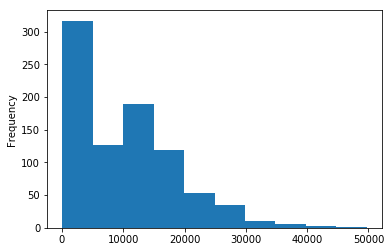

In [74]:
df['LTV'].plot.hist()

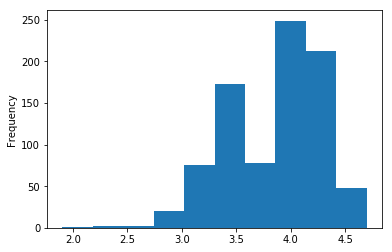

In [79]:
np.log10(df['LTV']).plot.hist()

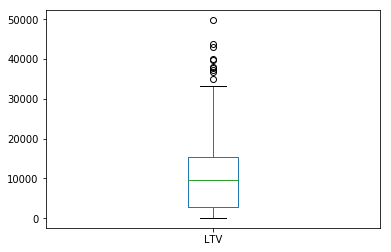

In [75]:
df['LTV'].plot.box()

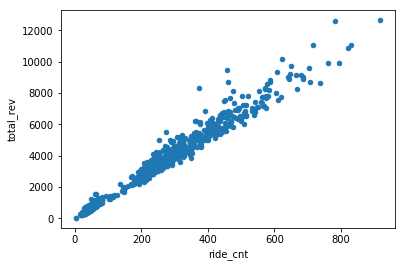

In [128]:
df.plot.scatter(x='ride_cnt',y='total_rev')

#### Findings:
- Becuase we'll use driver_onboard_date to do the calculation, so the NULL rows will be a problem. We remove these rows here for the convenience of moving forward, to compare the difference of churned and unchurned group.

In [113]:
df[df['driver_onboard_date'].isnull()]

,driver_id,total_rev,ride_cnt,driver_onboard_date,monthly_rev,month_cnt,LTV
74,17c09e7e39d8ab4bb4e035061d43ecdd,555.369607,49,NaN,555.369607,1,4998.326467
78,182a0089c24f844efcc4daa5a21eb895,1168.080439,81,NaN,1168.080439,1,10512.723951
131,2715aa38740fc559be08fd54dccd1803,1469.243613,118,NaN,489.747871,3,4407.730840
720,d4aa396834f13300174eabfaf0b40b50,609.225474,48,NaN,304.612737,2,2741.514633
721,d4eaaf54bb4d9446ec26ce36f33ef94f,1422.514462,93,NaN,1422.514462,1,12802.630159
796,e9555a277c135c402a14d12b819de1aa,1347.385248,107,NaN,673.692624,2,6063.233618
801,ec27575c98217627a852f24fe4233e5d,1350.747306,114,NaN,675.373653,2,6078.362876


In [114]:
df_new = df[df['driver_onboard_date'].notnull()]

In [116]:
# add churn info on the df

# by subtracting month 
df_new['duration'] = df_new['driver_onboard_date'].apply(lambda x: 6-int(x[5:7])+1)
# by comparing duration and month_cnt
df_new['churn'] = 0
df_new.loc[df_new['duration'] > df_new['month_cnt'],'churn'] = 1

C:\Users\Adimn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [125]:
df_new.head(10)

,driver_id,total_rev,ride_cnt,driver_onboard_date,monthly_rev,month_cnt,LTV,duration,churn
0,002be0ffdc997bd5c50703158b7c2491,3654.984968,277,2016-03-29 00:00:00,1173.823905,4,10564.415148,4,0
1,007f0389f9c7b03ef97098422f902e62,332.432198,31,2016-03-29 00:00:00,104.288686,4,938.598173,4,0
2,011e5c5dfc5c2c92501b8b24d47509bc,494.240355,34,2016-04-05 00:00:00,164.746785,3,1482.721065,3,0
3,0152a2f305e71d26cc964f8d4411add9,2646.743733,191,2016-04-23 00:00:00,882.247911,3,7940.231200,3,0
4,01674381af7edd264113d4e6ed55ecda,5463.341520,375,2016-04-29 00:00:00,1821.113840,3,16390.024560,3,0
5,0213f8b59219e32142711992ca4ec01f,2984.469654,240,2016-04-07 00:00:00,1492.234827,2,13430.113445,3,1
6,021e5cd15ef0bb3ec20a12af99e142b3,707.241542,53,2016-05-07 00:00:00,353.620771,2,3182.586938,2,0
7,0258e250ca195cc6258cbdc75aecd853,4340.860202,302,2016-04-26 00:00:00,1446.953401,3,13022.580606,3,0
8,028b5a4dcd7f4924ebfabcf2e814c014,5267.087720,363,2016-05-06 00:00:00,2633.543860,2,23701.894742,2,0
9,02d6a6b8a6da15fc219a9570f7ebbe78,1570.010208,62,2016-05-03 00:00:00,785.005104,2,7065.045937,2,0


In [127]:
# overall churn rate in approximate 3 months period
df_new['churn'].sum()/df_new.shape[0]

0.2388758782201405

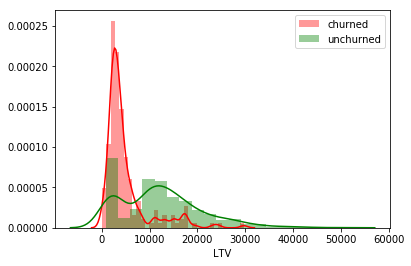

In [129]:
sns.distplot(df_new[df_new['churn']==1].LTV,color='red',label='churned')
sns.distplot(df_new[df_new['churn']==0].LTV,color='green',label='unchurned')
plt.legend()
plt.show()

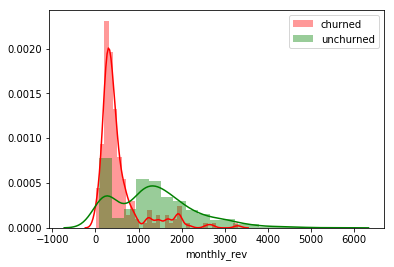

In [133]:
sns.distplot(df_new[df_new['churn']==1].monthly_rev,color='red',label='churned')
sns.distplot(df_new[df_new['churn']==0].monthly_rev,color='green',label='unchurned')
plt.legend()
plt.show()

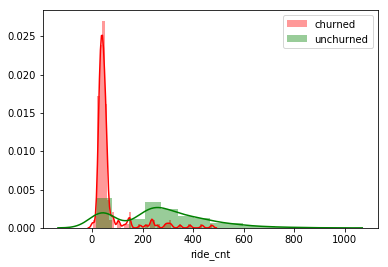

In [130]:
sns.distplot(df_new[df_new['churn']==1].ride_cnt,color='red',label='churned')
sns.distplot(df_new[df_new['churn']==0].ride_cnt,color='green',label='unchurned')
plt.legend()
plt.show()

In [132]:
df_new.groupby('churn').agg({'LTV':['mean','median','sum'],'total_rev':['mean','median','sum'],'ride_cnt':['mean','median','sum']})

LTV                                total_rev               \
               mean        median           sum         mean       median   
churn                                                                       
0      12355.821629  11856.466444  8.031284e+06  3678.865488  3598.314917   
1       4883.886052   3331.738766  9.963128e+05   883.840631   562.953127   

                       ride_cnt                 
                sum        mean median     sum  
churn                                           
0      2.391263e+06  265.592308    258  172635  
1      1.803035e+05   64.980392     44   13256